# Principal Component Regression (PCR) on Sensory and Fluorescence data

This notebook illustrates how to use the **hoggorm** package to carry out principal component regression (PCR) on multivariate data. Furthermore, we will learn how to visualise the results of the PCR using the **hoggormPlot** package.

---

### Import packages and prepare data

First import **hoggorm** for analysis of the data and **hoggormPlot** for plotting of the analysis results. We'll also import **pandas** such that we can read the data into a data frame. **numpy** is needed for checking dimensions of the data.

In [1]:
import hoggorm as ho
import hoggormplot as hop
import pandas as pd
import numpy as np

Next, load the data that we are going to analyse using **hoggorm**. After the data has been loaded into the pandas data frame, we'll display it in the notebook.

In [2]:
# Load fluorescence data
X_df = pd.read_csv('cheese_fluorescence.txt', index_col=0, sep='\t')
X_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292
Pr 1,19222.109,19937.834,20491.777,20994.000,21427.500,21915.891,22273.834,22750.279,23215.609,23497.221,...,1338.0557,1311.9445,1275.1666,1235.7777,1204.6666,1184.944500,1140.500000,1109.888800,1099.666600,1070.500000
Pr 2,18965.945,19613.334,20157.277,20661.557,21167.334,21554.057,22031.391,22451.889,22915.334,23311.611,...,1244.5555,1217.1666,1183.9445,1156.5000,1130.0555,1084.000000,1066.500000,1039.944500,1018.500000,992.083313
Pr 3,19698.221,20438.279,21124.721,21740.666,22200.445,22709.725,23222.111,23646.225,24047.389,24519.111,...,1409.5000,1366.9445,1319.8888,1289.7778,1258.2223,1235.166600,1200.611000,1173.277800,1126.555700,1097.250000
Pr 4,20037.334,20841.779,21510.889,22096.443,22605.889,23077.834,23547.725,23974.445,24490.889,24896.945,...,1374.5000,1332.3334,1287.5000,1252.9445,1228.8334,1195.944300,1159.166600,1153.611200,1117.222300,1088.333400
Pr 5,19874.889,20561.834,21248.500,21780.889,22328.834,22812.057,23266.111,23723.334,24171.221,24601.943,...,1329.0000,1291.9445,1256.7778,1226.6110,1209.7777,1169.888800,1144.555500,1123.333400,1084.888800,1081.500000
Pr 6,19529.391,20157.834,20847.500,21308.111,21716.443,22165.775,22583.166,22993.779,23520.779,24015.221,...,1737.3888,1696.5000,1635.5000,1580.3334,1556.8334,1501.222200,1463.555500,1419.277800,1365.388800,1343.416600
Pr 7,18795.582,19485.582,20139.584,20644.668,21013.668,21480.668,21873.666,22302.418,22662.500,23097.000,...,1323.3333,1286.9167,1261.0000,1235.0833,1190.0833,1174.666700,1129.166700,1095.416600,1070.416600,1049.500000
Pr 8,20052.943,20839.445,21569.221,22150.221,22662.389,23160.389,23589.943,24117.500,24484.334,24971.666,...,1140.2778,1113.1112,1075.8334,1055.7778,1037.1112,1025.777800,986.277832,969.388855,944.944397,936.083313
Pr 9,19001.391,19709.943,20368.443,20939.111,21383.111,21879.111,22335.221,22758.834,23213.443,23688.891,...,1119.1666,1076.7777,1045.3888,1033.1112,1021.3333,994.222229,962.111084,943.000000,920.166687,899.083313
Pr 10,20602.834,21406.389,22144.611,22775.000,23407.443,23940.609,24486.111,24976.275,25480.779,25966.279,...,1248.2777,1226.7778,1195.0000,1169.5000,1135.9445,1120.888800,1069.555500,1062.833400,1034.722200,1016.750000


In [3]:
# Load sensory data
Y_df = pd.read_csv('cheese_sensory.txt', index_col=0, sep='\t')
Y_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
Product,,,,,,,,,,,,,,,,,
Pr 01,6.19,3.33,3.43,2.14,1.29,3.11,6.70,3.22,2.66,5.10,4.57,3.34,2.93,1.89,1.23,3.15,4.07
Pr 02,6.55,2.50,4.32,2.52,1.24,3.91,6.68,2.57,2.42,4.87,4.75,4.13,3.09,2.29,1.51,3.93,4.07
Pr 03,6.23,3.43,3.42,2.03,1.28,2.93,6.61,3.39,2.56,5.00,4.73,3.44,3.08,1.81,1.37,3.19,4.16
Pr 04,6.14,2.93,3.96,2.13,1.08,3.12,6.51,2.98,2.50,4.66,4.68,3.92,2.93,1.99,1.19,3.13,4.29
Pr 05,6.70,1.97,4.72,2.43,1.13,4.60,7.01,2.07,2.32,5.29,5.19,4.52,3.14,2.47,1.34,4.67,4.03
Pr 06,6.19,5.28,1.59,1.07,1.00,1.13,6.42,5.18,2.82,5.02,4.49,2.05,2.54,1.18,1.18,1.29,4.11
Pr 07,6.17,3.45,3.32,2.04,1.47,2.69,6.39,3.81,2.76,4.58,4.32,3.22,2.72,1.81,1.33,2.52,4.26
Pr 08,6.90,2.58,4.24,2.58,1.70,4.19,7.11,2.06,2.47,4.58,5.09,4.44,3.25,2.62,1.73,4.87,3.98
Pr 09,6.70,2.53,4.53,2.32,1.22,4.16,6.91,2.42,2.41,4.52,4.96,4.49,3.37,2.47,1.64,4.54,4.01


The ``nipalsPCR`` class in hoggorm accepts only **numpy** arrays with numerical values and not pandas data frames. Therefore, the pandas data frames holding the imported data need to be "taken apart" into three parts: 
* two numpy array holding the numeric values
* two Python list holding variable (column) names
* two Python list holding object (row) names. 

The numpy arrays with values will be used as input for the ``nipalsPCR`` class for analysis. The Python lists holding the variable and row names will be used later in the plotting function from the **hoggormPlot** package when visualising the results of the analysis. Below is the code needed to access both data, variable names and object names.

In [4]:
# Get the values from the data frame
X = X_df.values
Y = Y_df.values

# Get the variable or columns names
X_varNames = list(X_df.columns)
Y_varNames = list(Y_df.columns)

# Get the object or row names
X_objNames = list(X_df.index)
Y_objNames = list(Y_df.index)

---

### Apply PCR to our data

Now, let's run PCR on the data using the ``nipalsPCR`` class. The documentation provides a [description of the input parameters](https://hoggorm.readthedocs.io/en/latest/pcr.html). Using input paramter ``arrX`` and ``arrY`` we define which numpy array we would like to analyse. ``arrY`` is what typically is considered to be the response matrix, while the measurements are typically defined as ``arrX``. By setting input parameter ``Xstand=False`` and ``Ystand=False`` we make sure that the variables are only mean centered, not scaled to unit variance, if this is what you want. This is the default setting and actually doesn't need to expressed explicitly. Setting paramter ``cvType=["loo"]`` we make sure that we compute the PCR model using full cross validation. ``"loo"`` means "Leave One Out". By setting paramter ``numpComp=4`` we ask for four components to be computed.

In [5]:
model = ho.pcr.nipalsPCR(arrX=X, Xstand=False, 
                      arrY=Y, Ystand=False,
                      cvType=["loo"], 
                      numComp=4)

loo


That's it, the PCR model has been computed. Now we would like to inspect the results by visualising them. We can do this using plotting functions of the separate [**hoggormPlot** package](https://hoggormplot.readthedocs.io/en/latest/). If we wish to plot the results for component 1 and component 2, we can do this by setting the input argument ``comp=[1, 2]``. The input argument ``plots=[1, 2, 3, 4, 6]`` lets the user define which plots are to be plotted. If this list for example contains value ``1``, the function will generate the scores plot for the model. If the list contains value ``2``, then the loadings plot will be plotted. Value ``3`` stands for correlation loadings plot and value ``4`` stands for bi-plot and ``6`` stands for explained variance plot. The hoggormPlot documentation provides a [description of input paramters](https://hoggormplot.readthedocs.io/en/latest/mainPlot.html).

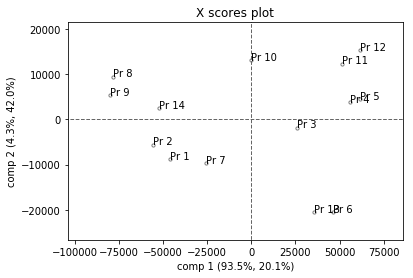

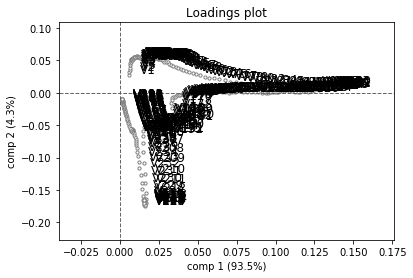

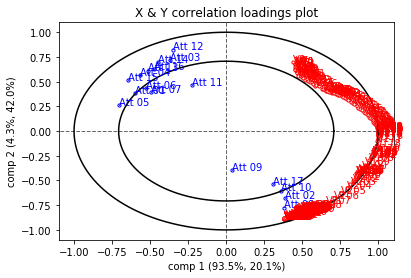

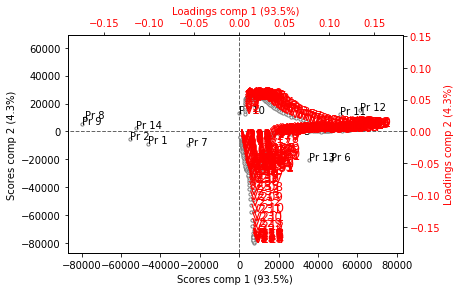

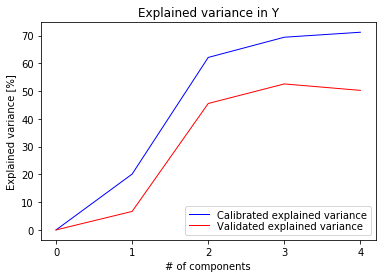

In [6]:
hop.plot(model, comp=[1, 2], 
         plots=[1, 2, 3, 4, 6], 
         objNames=X_objNames, 
         XvarNames=X_varNames,
         YvarNames=Y_varNames)

Plots can also be called separately.

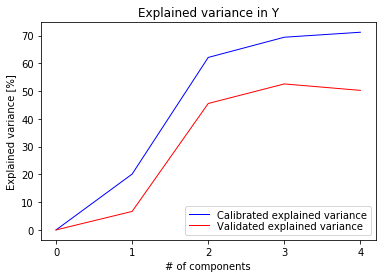

In [7]:
# Plot cumulative explained variance (both calibrated and validated) using a specific function for that.
hop.explainedVariance(model)

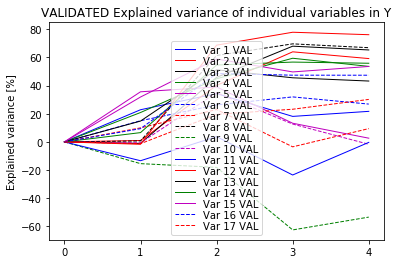

In [8]:
# Plot cumulative validated explained variance for each variable in Y
hop.explainedVariance(model, individual = True)

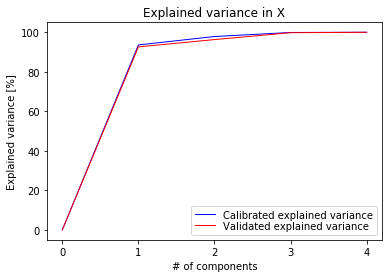

In [9]:
# Plot cumulative validated explained variance in X.
hop.explainedVariance(model, which=['X'])

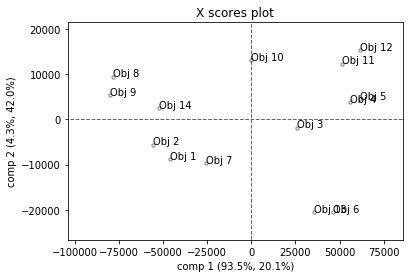

In [10]:
hop.scores(model)

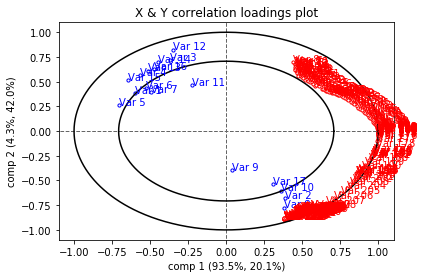

In [11]:
hop.correlationLoadings(model)

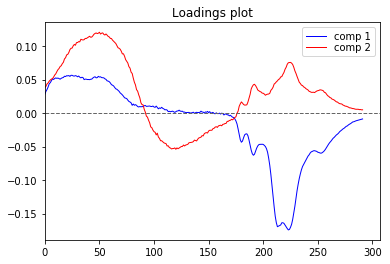

In [12]:
# Plot X loadings in line plot
hop.loadings(model, weights=False, line=True)

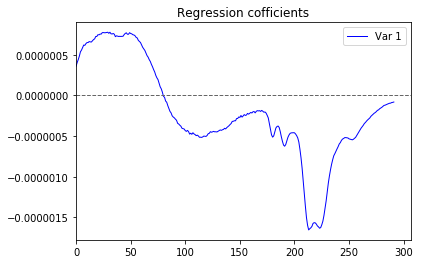

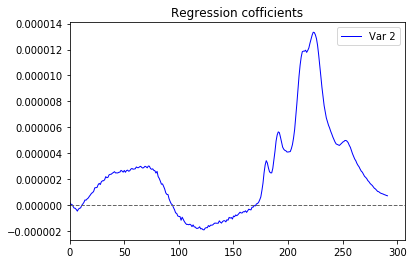

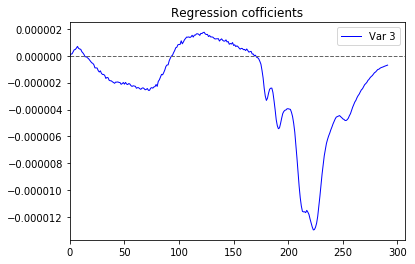

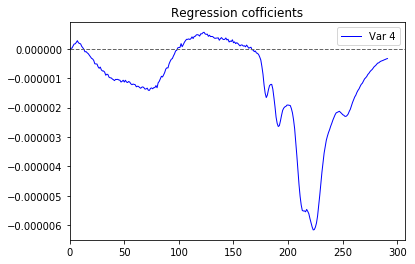

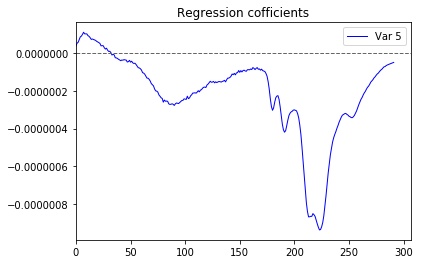

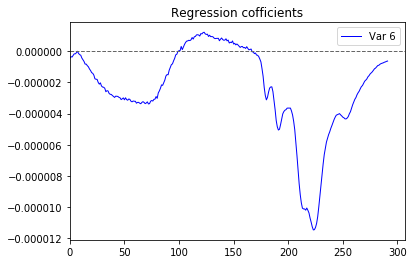

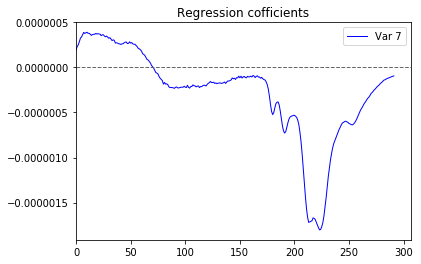

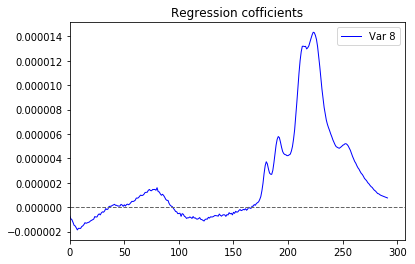

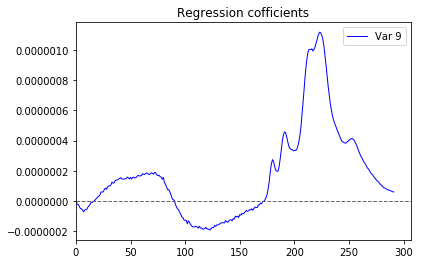

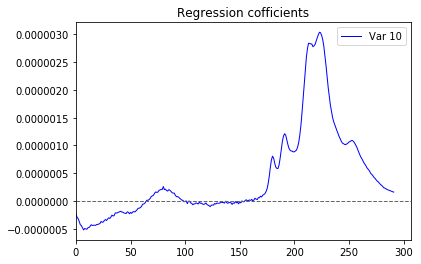

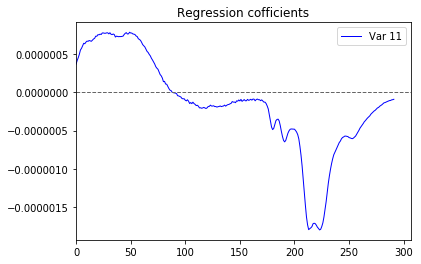

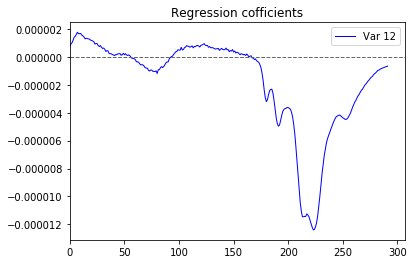

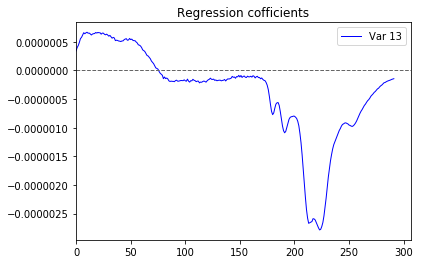

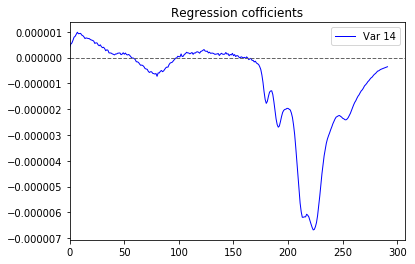

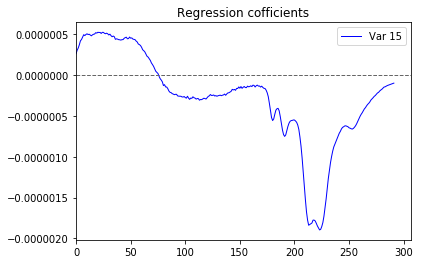

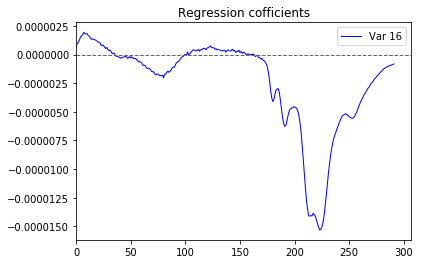

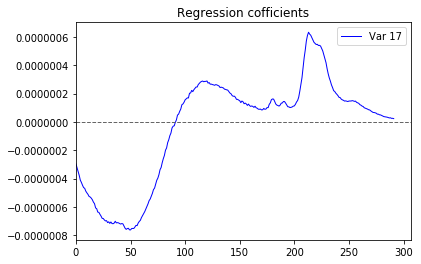

In [13]:
# Plot regression coefficients
hop.coefficients(model, comp=[3])

---

### Accessing numerical results

Now that we have visualised the PCR results, we may also want to access the numerical results. Below are some examples. For a complete list of accessible results, please see this part of the documentation.  

In [14]:
# Get X scores and store in numpy array
X_scores = model.X_scores()

# Get scores and store in pandas dataframe with row and column names
X_scores_df = pd.DataFrame(model.X_scores())
X_scores_df.index = X_objNames
X_scores_df.columns = ['PC{0}'.format(x+1) for x in range(model.X_scores().shape[1])]
X_scores_df

,PC1,PC2,PC3,PC4
Pr 1,-46235.388842,-8717.873290,-3974.316022,2008.651345
Pr 2,-55700.655407,-5561.133347,-7958.399234,927.825886
Pr 3,26056.724511,-1797.162736,1350.038554,2854.197200
Pr 4,55637.962327,3815.562748,-1425.993451,1958.567694
Pr 5,61774.133462,4532.657460,-5169.865888,-698.350362
Pr 6,46345.718156,-20485.755041,9897.271103,-1276.262891
Pr 7,-25801.684902,-9619.724652,-11891.141386,1875.716179
Pr 8,-78141.016534,9487.744780,12275.801651,19.300145
Pr 9,-79878.030101,5346.788824,142.859030,-2233.575706
Pr 10,51.244910,13139.576999,15107.365109,2129.125480


In [15]:
help(ho.pcr.nipalsPCR.X_scores)

Help on function X_scores in module hoggorm.pcr:

X_scores(self)
    Returns array holding scores of array X. First column holds scores
    for component 1, second column holds scores for component 2, etc.



In [16]:
# Dimension of the X_scores
np.shape(model.X_scores())

(14, 4)

We see that the numpy array holds the scores for all countries and OECD (35 in total) for four components as required when computing the PCA model.

In [17]:
# Get X loadings and store in numpy array
X_loadings = model.X_loadings()

# Get X loadings and store in pandas dataframe with row and column names
X_loadings_df = pd.DataFrame(model.X_loadings())
X_loadings_df.index = X_varNames
X_loadings_df.columns = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
X_loadings_df

,PC1,PC2,PC3,PC4
V1,0.006144,0.028137,0.038192,0.056608
V2,0.006142,0.032252,0.039798,0.069730
V3,0.006440,0.035096,0.043432,0.072272
V4,0.006401,0.038891,0.044961,0.083100
V5,0.006646,0.043597,0.047483,0.091887
V6,0.006752,0.045333,0.049280,0.096767
V7,0.006893,0.048167,0.050629,0.103574
V8,0.006852,0.050964,0.051311,0.105445
V9,0.007123,0.050093,0.053572,0.109077
V10,0.007311,0.051493,0.056660,0.098715


In [18]:
help(ho.pcr.nipalsPCR.X_loadings)

Help on function X_loadings in module hoggorm.pcr:

X_loadings(self)
    Returns array holding loadings of array X. Rows represent variables
    and columns represent components. First column holds loadings for
    component 1, second column holds scores for component 2, etc.



In [19]:
np.shape(model.X_loadings())

(292, 4)

Here we see that the array holds the loadings for the 10 variables in the data across four components.

In [20]:
# Get Y loadings and store in numpy array
Y_loadings = model.Y_loadings()

# Get Y loadings and store in pandas dataframe with row and column names
Y_loadings_df = pd.DataFrame(model.Y_loadings())
Y_loadings_df.index = Y_varNames
Y_loadings_df.columns = ['PC{0}'.format(x+1) for x in range(model.Y_loadings().shape[1])]
Y_loadings_df

,PC1,PC2,PC3,PC4
Att 01,-3.385061e-06,0.000010,2.460886e-06,-4.064327e-05
Att 02,6.788180e-06,-0.000056,4.585612e-05,8.762731e-06
Att 03,-6.075291e-06,0.000056,-4.126024e-05,1.546925e-07
Att 04,-5.566337e-06,0.000026,-1.998260e-05,2.032396e-05
Att 05,-2.485324e-06,0.000004,-1.856911e-06,1.485971e-05
Att 06,-1.187460e-05,0.000046,-4.387961e-05,-5.196775e-05
Att 07,-2.560547e-06,0.000009,-1.480605e-06,-5.003580e-05
Att 08,7.138950e-06,-0.000068,3.066398e-05,6.260500e-05
Att 09,1.039179e-07,-0.000005,3.464589e-06,2.969919e-05
Att 10,1.951004e-06,-0.000015,4.694694e-06,-8.471424e-06


In [21]:
# Get X correlation loadings and store in numpy array
X_corrloadings = model.X_corrLoadings()

# Get X correlation loadings and store in pandas dataframe with row and column names
X_corrloadings_df = pd.DataFrame(model.X_corrLoadings())
X_corrloadings_df.index = X_varNames
X_corrloadings_df.columns = ['PC{0}'.format(x+1) for x in range(model.X_corrLoadings().shape[1])]
X_corrloadings_df

,PC1,PC2,PC3,PC4
V1,0.567137,0.554810,0.520081,0.187925
V2,0.531879,0.596693,0.508494,0.217195
V3,0.522913,0.608815,0.520323,0.211077
V4,0.494237,0.641496,0.512169,0.230771
V5,0.474794,0.665423,0.500502,0.236116
V6,0.466675,0.669329,0.502485,0.240542
V7,0.458177,0.683963,0.496498,0.247614
V8,0.440653,0.700217,0.486865,0.243909
V9,0.452480,0.679794,0.502076,0.249213
V10,0.453059,0.681736,0.518053,0.220032


In [22]:
help(ho.pcr.nipalsPCR.X_corrLoadings)

Help on function X_corrLoadings in module hoggorm.pcr:

X_corrLoadings(self)
    Returns array holding correlation loadings of array X. First column
    holds correlation loadings for component 1, second column holds
    correlation loadings for component 2, etc.



In [23]:
# Get Y loadings and store in numpy array
Y_corrloadings = model.X_corrLoadings()

# Get Y loadings and store in pandas dataframe with row and column names
Y_corrloadings_df = pd.DataFrame(model.Y_corrLoadings())
Y_corrloadings_df.index = Y_varNames
Y_corrloadings_df.columns = ['PC{0}'.format(x+1) for x in range(model.Y_corrLoadings().shape[1])]
Y_corrloadings_df

,PC1,PC2,PC3,PC4
Att 01,-0.599289,0.382522,0.064277,-0.258796
Att 02,0.386325,-0.681831,0.385025,0.017937
Att 03,-0.367345,0.722288,-0.368070,0.000336
Att 04,-0.564047,0.567494,-0.298738,0.074072
Att 05,-0.707362,0.263808,-0.077972,0.152114
Att 06,-0.529085,0.435212,-0.288444,-0.083280
Att 07,-0.494308,0.390416,-0.042169,-0.347412
Att 08,0.378537,-0.773778,0.239880,0.119394
Att 09,0.039473,-0.397940,0.194157,0.405745
Att 10,0.361240,-0.602301,0.128244,-0.056415


In [24]:
help(ho.pcr.nipalsPCR.Y_corrLoadings)

Help on function Y_corrLoadings in module hoggorm.pcr:

Y_corrLoadings(self)
    Returns array holding correlation loadings of array X. First column
    holds correlation loadings for component 1, second column holds
    correlation loadings for component 2, etc.



In [25]:
# Get calibrated explained variance of each component in X
X_calExplVar = model.X_calExplVar()

# Get calibrated explained variance in X and store in pandas dataframe with row and column names
X_calExplVar_df = pd.DataFrame(model.X_calExplVar())
X_calExplVar_df.columns = ['calibrated explained variance in X']
X_calExplVar_df.index = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
X_calExplVar_df

,calibrated explained variance in X
PC1,93.539814
PC2,4.268986
PC3,2.036011
PC4,0.121003


In [26]:
help(ho.pcr.nipalsPCR.X_calExplVar)

Help on function X_calExplVar in module hoggorm.pcr:

X_calExplVar(self)
    Returns a list holding the calibrated explained variance for
    each component. First number in list is for component 1, second number
    for component 2, etc.



In [27]:
# Get calibrated explained variance of each component in Y
Y_calExplVar = model.Y_calExplVar()

# Get calibrated explained variance in Y and store in pandas dataframe with row and column names
Y_calExplVar_df = pd.DataFrame(model.Y_calExplVar())
Y_calExplVar_df.columns = ['calibrated explained variance in Y']
Y_calExplVar_df.index = ['PC{0}'.format(x+1) for x in range(model.Y_loadings().shape[1])]
Y_calExplVar_df

,calibrated explained variance in Y
PC1,20.115939
PC2,42.017879
PC3,7.288100
PC4,1.792730


In [28]:
help(ho.pcr.nipalsPCR.Y_calExplVar)

Help on function Y_calExplVar in module hoggorm.pcr:

Y_calExplVar(self)
    Returns a list holding the calibrated explained variance for each
    component. First number in list is for component 1, second number for
    component 2, etc.



In [29]:
# Get cumulative calibrated explained variance in X
X_cumCalExplVar = model.X_cumCalExplVar()

# Get cumulative calibrated explained variance in X and store in pandas dataframe with row and column names
X_cumCalExplVar_df = pd.DataFrame(model.X_cumCalExplVar())
X_cumCalExplVar_df.columns = ['cumulative calibrated explained variance in X']
X_cumCalExplVar_df.index = ['PC{0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
X_cumCalExplVar_df

,cumulative calibrated explained variance in X
PC0,0.000000
PC1,93.539814
PC2,97.808800
PC3,99.844811
PC4,99.965813


In [30]:
help(ho.pcr.nipalsPCR.X_cumCalExplVar)

Help on function X_cumCalExplVar in module hoggorm.pcr:

X_cumCalExplVar(self)
    Returns a list holding the cumulative calibrated explained variance
    for array X after each component.



In [31]:
# Get cumulative calibrated explained variance in Y
Y_cumCalExplVar = model.Y_cumCalExplVar()

# Get cumulative calibrated explained variance in Y and store in pandas dataframe with row and column names
Y_cumCalExplVar_df = pd.DataFrame(model.Y_cumCalExplVar())
Y_cumCalExplVar_df.columns = ['cumulative calibrated explained variance in Y']
Y_cumCalExplVar_df.index = ['PC{0}'.format(x) for x in range(model.Y_loadings().shape[1] + 1)]
Y_cumCalExplVar_df

,cumulative calibrated explained variance in Y
PC0,0.000000
PC1,20.115939
PC2,62.133818
PC3,69.421918
PC4,71.214648


In [32]:
help(ho.pcr.nipalsPCR.Y_cumCalExplVar)

Help on function Y_cumCalExplVar in module hoggorm.pcr:

Y_cumCalExplVar(self)
    Returns a list holding the cumulative calibrated explained variance
    for array X after each component. First number represents zero
    components, second number represents component 1, etc.



In [33]:
# Get cumulative calibrated explained variance for each variable in X
X_cumCalExplVar_ind = model.X_cumCalExplVar_indVar()

# Get cumulative calibrated explained variance for each variable in X and store in pandas dataframe with row and column names
X_cumCalExplVar_ind_df = pd.DataFrame(model.X_cumCalExplVar_indVar())
X_cumCalExplVar_ind_df.columns = X_varNames
X_cumCalExplVar_ind_df.index = ['PC{0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
X_cumCalExplVar_ind_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292
PC0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PC1,32.164412,28.289576,27.343756,24.427070,22.542937,21.778519,20.992612,19.417491,20.473788,20.526242,...,26.200123,25.575173,25.750270,26.936242,27.329181,26.673429,28.611167,31.336472,28.288255,31.311316
PC2,62.945773,63.893786,64.409267,65.578798,66.821670,66.578591,67.773171,68.447893,66.685829,67.002610,...,91.934588,91.593694,92.282711,92.266225,91.915127,90.718492,92.317664,91.134997,91.331551,90.859014
PC3,89.994228,89.750390,91.482905,91.810520,91.871922,91.827746,92.424158,92.151654,91.893900,93.840533,...,99.821948,99.704752,99.774147,99.670087,99.917617,99.586387,99.856116,99.837538,99.488451,99.428313
PC4,93.525798,94.467742,95.938263,97.136033,97.446988,97.613799,98.555403,98.100833,98.104619,98.681926,...,99.828155,99.719213,99.848348,99.670706,99.944427,99.586897,99.859556,99.845586,99.505703,99.460603


In [34]:
help(ho.pcr.nipalsPCR.X_cumCalExplVar_indVar)

Help on function X_cumCalExplVar_indVar in module hoggorm.pcr:

X_cumCalExplVar_indVar(self)
    Returns an array holding the cumulative calibrated explained variance
    for each variable in X after each component. First row represents zero
    components, second row represents one component, third row represents
    two components, etc. Columns represent variables.



In [35]:
# Get cumulative calibrated explained variance for each variable in Y
Y_cumCalExplVar_ind = model.Y_cumCalExplVar_indVar()

# Get cumulative calibrated explained variance for each variable in Y and store in pandas dataframe with row and column names
Y_cumCalExplVar_ind_df = pd.DataFrame(model.Y_cumCalExplVar_indVar())
Y_cumCalExplVar_ind_df.columns = Y_varNames
Y_cumCalExplVar_ind_df.index = ['PC{0}'.format(x) for x in range(model.Y_loadings().shape[1] + 1)]
Y_cumCalExplVar_ind_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
PC0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PC1,35.914709,14.924697,13.494245,31.814937,50.036037,27.993114,24.434081,14.329026,0.155812,13.049432,4.934036,12.053852,26.374993,20.157793,41.670375,22.616409,9.517266
PC2,50.547028,61.414028,65.664221,64.019879,56.995495,46.934042,39.676570,74.202309,15.991448,49.326108,26.331222,79.969111,63.867470,68.755782,67.989574,62.195664,37.921901
PC3,50.960177,76.238423,79.211797,72.944293,57.603466,55.254024,39.854395,79.956559,19.761138,50.970758,26.599462,85.321326,64.093869,72.183285,68.004031,65.978787,48.279275
PC4,57.657719,76.270595,79.211808,73.492958,59.917322,55.947578,51.923939,81.382051,36.224056,51.289021,42.544252,85.543500,66.628940,74.251770,76.402141,69.634208,62.954712


In [36]:
help(ho.pcr.nipalsPCR.Y_cumCalExplVar_indVar)

Help on function Y_cumCalExplVar_indVar in module hoggorm.pcr:

Y_cumCalExplVar_indVar(self)
    Returns an array holding the cumulative calibrated explained variance
    for each variable in Y after each component. First row represents zero
    components, second row represents one component, third row represents
    two components, etc. Columns represent variables.



In [37]:
# Get calibrated predicted Y for a given number of components

# Predicted Y from calibration using 1 component
Y_from_1_component = model.Y_predCal()[1]

# Predicted Y from calibration using 1 component stored in pandas data frame with row and columns names
Y_from_1_component_df = pd.DataFrame(model.Y_predCal()[1])
Y_from_1_component_df.index = Y_objNames
Y_from_1_component_df.columns = Y_varNames
Y_from_1_component_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
Pr 01,6.516510,2.847574,3.928036,2.336647,1.352767,3.606884,6.789102,2.692071,2.530195,4.755509,4.791457,3.968650,3.122877,2.253992,1.530046,3.955747,4.049942
Pr 02,6.548550,2.783322,3.985541,2.389334,1.376291,3.719280,6.813338,2.624499,2.529212,4.737042,4.802138,4.019846,3.148325,2.296338,1.556669,4.066887,4.044227
Pr 03,6.271796,3.338306,3.488841,1.934245,1.173098,2.748444,6.603995,3.208161,2.537708,4.896551,4.709884,3.577636,2.928517,1.930569,1.326710,3.106902,4.093589
Pr 04,6.171662,3.539109,3.309126,1.769586,1.099579,2.397179,6.528251,3.419339,2.540782,4.954264,4.676504,3.417636,2.848986,1.798228,1.243507,2.759563,4.111449
Pr 05,6.150891,3.580763,3.271847,1.735430,1.084328,2.324314,6.512539,3.463145,2.541419,4.966236,4.669580,3.384447,2.832489,1.770776,1.226248,2.687513,4.115154
Pr 06,6.203117,3.476032,3.365579,1.821310,1.122673,2.507520,6.552044,3.353003,2.539816,4.936135,4.686990,3.467896,2.873969,1.839800,1.269644,2.868672,4.105839
Pr 07,6.447340,2.986282,3.803896,2.222907,1.301983,3.364242,6.736781,2.837946,2.532319,4.795375,4.768400,3.858128,3.067940,2.162575,1.472572,3.715817,4.062279
Pr 08,6.624512,2.630993,4.121872,2.514245,1.432063,3.985750,6.870798,2.464298,2.526880,4.693261,4.827459,4.141221,3.208657,2.396733,1.619787,4.330379,4.030679
Pr 09,6.630392,2.619202,4.132425,2.523914,1.436380,4.006377,6.875246,2.451898,2.526699,4.689872,4.829419,4.150617,3.213327,2.404504,1.624673,4.350775,4.029630
Pr 10,6.359827,3.161776,3.646832,2.079000,1.237730,3.057249,6.670583,3.022509,2.535005,4.845814,4.739228,3.718294,2.998434,2.046914,1.399856,3.412255,4.077888


In [38]:
# Get calibrated predicted Y for a given number of components

# Predicted Y from calibration using 4 component
Y_from_4_component = model.Y_predCal()[4]

# Predicted Y from calibration using 1 component stored in pandas data frame with row and columns names
Y_from_4_component_df = pd.DataFrame(model.Y_predCal()[4])
Y_from_4_component_df.index = Y_objNames
Y_from_4_component_df.columns = Y_varNames
Y_from_4_component_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
Pr 01,6.336919,3.171833,3.604856,2.228349,1.352170,3.278287,6.611953,3.291464,2.618833,4.852581,4.575193,3.500805,2.952228,1.940177,1.369718,3.187603,4.151344
Pr 02,6.435010,2.738383,4.003091,2.421435,1.380728,3.766006,6.726052,2.818425,2.556466,4.776499,4.674448,3.861110,3.056816,2.178053,1.468732,3.799811,4.124696
Pr 03,6.140938,3.526010,3.333088,1.918164,1.205206,2.458708,6.442171,3.551008,2.635966,4.906075,4.531551,3.378376,2.833126,1.741522,1.207222,2.557676,4.156096
Pr 04,6.127141,3.276902,3.581618,1.937912,1.147885,2.532425,6.468484,3.237591,2.575298,4.872878,4.605470,3.641792,2.863256,1.862086,1.215178,2.826351,4.139734
Pr 05,6.212395,3.083379,3.738499,1.943368,1.103217,2.794702,6.598045,2.951275,2.480540,4.878863,4.749604,3.797405,2.925413,2.010633,1.300029,3.277023,4.100537
Pr 06,6.072152,5.067553,1.811529,1.060562,0.996447,1.202897,6.407316,4.975955,2.636663,5.305346,4.551287,2.021020,2.579452,1.100772,1.096580,1.224494,4.137003
Pr 07,6.244548,2.996917,3.756917,2.246463,1.310198,3.348706,6.569467,3.247860,2.594003,4.870139,4.535595,3.532202,2.900206,1.923725,1.310286,3.157244,4.199112
Pr 08,6.749896,2.662004,4.145893,2.518057,1.450720,3.879893,6.941474,2.193832,2.523456,4.606259,4.952622,4.411129,3.329845,2.550973,1.714026,4.618117,3.932350
Pr 09,6.775601,2.306329,4.425158,2.615830,1.426123,4.360650,7.037409,1.951211,2.434639,4.628049,5.014456,4.514059,3.345076,2.665576,1.758984,5.028045,3.956355
Pr 10,6.443363,3.136322,3.758545,2.164843,1.298324,2.884472,6.666071,2.721502,2.586144,4.698627,4.790618,4.095419,3.120741,2.200424,1.457230,3.596438,3.993621


In [39]:
help(ho.pcr.nipalsPCR.X_predCal)

Help on function X_predCal in module hoggorm.pcr:

X_predCal(self)
    Returns a dictionary holding the predicted arrays Xhat from
    calibration after each computed component. Dictionary key represents
    order of component.



In [40]:
# Get validated explained variance of each component X
X_valExplVar = model.X_valExplVar()

# Get calibrated explained variance in X and store in pandas dataframe with row and column names
X_valExplVar_df = pd.DataFrame(model.X_valExplVar())
X_valExplVar_df.columns = ['validated explained variance in X']
X_valExplVar_df.index = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
X_valExplVar_df

,validated explained variance in X
PC1,92.567198
PC2,3.686847
PC3,3.487134
PC4,0.187901


In [41]:
help(ho.pcr.nipalsPCR.X_valExplVar)

Help on function X_valExplVar in module hoggorm.pcr:

X_valExplVar(self)
    Returns a list holding the validated explained variance for X after
    each component. First number in list is for component 1, second number
    for component 2, third number for component 3, etc.



In [42]:
# Get validated explained variance of each component Y
Y_valExplVar = model.Y_valExplVar()

# Get calibrated explained variance in X and store in pandas dataframe with row and column names
Y_valExplVar_df = pd.DataFrame(model.Y_valExplVar())
Y_valExplVar_df.columns = ['validated explained variance in Y']
Y_valExplVar_df.index = ['PC{0}'.format(x+1) for x in range(model.Y_loadings().shape[1])]
Y_valExplVar_df

,validated explained variance in Y
PC1,6.662040
PC2,38.887208
PC3,7.046848
PC4,-2.328466


In [43]:
help(ho.pcr.nipalsPCR.Y_valExplVar)

Help on function Y_valExplVar in module hoggorm.pcr:

Y_valExplVar(self)
    Returns a list holding the validated explained variance for Y after
    each component. First number in list is for component 1, second number
    for component 2, third number for component 3, etc.



In [44]:
# Get cumulative validated explained variance in X
X_cumValExplVar = model.X_cumValExplVar()

# Get cumulative validated explained variance in X and store in pandas dataframe with row and column names
X_cumValExplVar_df = pd.DataFrame(model.X_cumValExplVar())
X_cumValExplVar_df.columns = ['cumulative validated explained variance in X']
X_cumValExplVar_df.index = ['PC{0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
X_cumValExplVar_df

,cumulative validated explained variance in X
PC0,0.000000
PC1,92.567198
PC2,96.254045
PC3,99.741179
PC4,99.929080


In [45]:
help(ho.pcr.nipalsPCR.X_cumValExplVar)

Help on function X_cumValExplVar in module hoggorm.pcr:

X_cumValExplVar(self)
    Returns a list holding the cumulative validated explained variance
    for array X after each component. First number represents zero
    components, second number represents component 1, etc.



In [46]:
# Get cumulative validated explained variance in Y
Y_cumValExplVar = model.Y_cumValExplVar()

# Get cumulative validated explained variance in Y and store in pandas dataframe with row and column names
Y_cumValExplVar_df = pd.DataFrame(model.Y_cumValExplVar())
Y_cumValExplVar_df.columns = ['cumulative validated explained variance in Y']
Y_cumValExplVar_df.index = ['PC{0}'.format(x) for x in range(model.Y_loadings().shape[1] + 1)]
Y_cumValExplVar_df

,cumulative validated explained variance in Y
PC0,0.000000
PC1,6.662040
PC2,45.549248
PC3,52.596096
PC4,50.267630


In [47]:
help(ho.pcr.nipalsPCR.Y_cumValExplVar)

Help on function Y_cumValExplVar in module hoggorm.pcr:

Y_cumValExplVar(self)
    Returns a list holding the cumulative validated explained variance
    for array X after each component. First number represents zero
    components, second number represents component 1, etc.



In [48]:
# Get cumulative validated explained variance for each variable in Y
Y_cumCalExplVar_ind = model.Y_cumCalExplVar_indVar()

# Get cumulative validated explained variance for each variable in Y and store in pandas dataframe with row and column names
Y_cumValExplVar_ind_df = pd.DataFrame(model.Y_cumValExplVar_indVar())
Y_cumValExplVar_ind_df.columns = Y_varNames
Y_cumValExplVar_ind_df.index = ['PC{0}'.format(x) for x in range(model.Y_loadings().shape[1] + 1)]
Y_cumValExplVar_ind_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
PC0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PC1,22.833220,1.009842,-1.071133,20.850490,35.577512,15.032226,9.960306,0.703347,-15.433239,-0.656623,-13.365279,-1.693363,14.788479,6.592350,31.871732,9.397392,-1.266040
PC2,34.313232,40.113981,45.839311,44.843201,39.022956,26.256120,23.002801,61.339052,-18.088508,34.924441,3.741503,68.694741,51.239737,54.579770,58.889413,48.534248,19.599767
PC3,18.109378,63.958008,67.967272,59.394582,13.254765,31.947264,-3.505309,69.616691,-62.496367,12.672985,-23.498099,77.860678,45.516552,56.677868,49.682719,47.371602,23.190065
PC4,21.694482,59.168525,65.286697,53.612398,2.637171,26.848480,9.445164,66.884809,-53.398613,-1.692999,-0.330072,76.116054,43.214879,55.841880,53.566102,47.347672,30.171176


In [49]:
help(ho.pcr.nipalsPCR.X_cumValExplVar_indVar)

Help on function X_cumValExplVar_indVar in module hoggorm.pcr:

X_cumValExplVar_indVar(self)
    Returns an array holding the cumulative validated explained variance
    for each variable in X after each component. First row represents
    zero components, second row represents component 1, third row for
    compnent 2, etc. Columns represent variables.



In [50]:
# Get validated predicted Y for a given number of components

# Predicted Y from validation using 1 component
Y_from_1_component_val = model.Y_predVal()[1]

# Predicted Y from calibration using 1 component stored in pandas data frame with row and columns names
Y_from_1_component_val_df = pd.DataFrame(model.Y_predVal()[1])
Y_from_1_component_val_df.index = Y_objNames
Y_from_1_component_val_df.columns = Y_varNames
Y_from_1_component_val_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
Pr 01,6.563612,2.777345,4.000663,2.364920,1.361585,3.678111,6.801893,2.614827,2.511272,4.705474,4.823721,4.060545,3.150846,2.306934,1.573397,4.072651,4.046953
Pr 02,6.547970,2.834473,3.925489,2.365290,1.400209,3.683379,6.836882,2.634214,2.548641,4.713345,4.811586,4.000415,3.158614,2.297302,1.564746,4.090512,4.039517
Pr 03,6.275945,3.329126,3.495775,1.925017,1.162690,2.730968,6.603463,3.190150,2.535514,4.886386,4.707955,3.591282,2.913777,1.942480,1.322538,3.099095,4.087083
Pr 04,6.177284,3.648982,3.191775,1.704802,1.103089,2.267436,6.531441,3.499035,2.548170,5.007103,4.675726,3.326779,2.834319,1.763453,1.252990,2.692308,4.079588
Pr 05,6.038449,3.912657,2.973281,1.592565,1.075098,1.857069,6.410541,3.750526,2.587011,4.900187,4.562711,3.150027,2.769272,1.626744,1.202927,2.279691,4.132623
Pr 06,6.208511,3.207059,3.629798,1.935856,1.142689,2.718887,6.573810,3.079826,2.499167,4.921335,4.716914,3.680296,2.925184,1.940618,1.285596,3.110454,4.104463
Pr 07,6.473700,2.942335,3.849964,2.239700,1.285219,3.427534,6.770014,2.744535,2.510215,4.816542,4.811810,3.919427,3.101311,2.196152,1.485954,3.830073,4.043140
Pr 08,6.539253,2.655189,4.078234,2.488470,1.350791,3.913265,6.797269,2.595210,2.544029,4.729705,4.747871,4.043338,3.192541,2.324291,1.583766,4.155375,4.046981
Pr 09,6.607610,2.651790,4.004392,2.584495,1.502803,3.953890,6.863414,2.467726,2.563253,4.743862,4.787958,4.040363,3.163318,2.381231,1.618766,4.285225,4.036168
Pr 10,6.360585,3.163447,3.647361,2.072004,1.242941,3.094737,6.683706,3.041928,2.525390,4.852414,4.746862,3.692013,2.989853,2.034371,1.395231,3.417052,4.089264


In [51]:
# Get validated predicted Y for a given number of components

# Predicted Y from validation using 3 components
Y_from_3_component_val = model.Y_predVal()[3]

# Predicted Y from calibration using 3 components stored in pandas data frame with row and columns names
Y_from_3_component_val_df = pd.DataFrame(model.Y_predVal()[3])
Y_from_3_component_val_df.index = Y_objNames
Y_from_3_component_val_df.columns = Y_varNames
Y_from_3_component_val_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
Pr 01,6.472332,3.113015,3.645557,2.198612,1.329782,3.446372,6.715999,3.151306,2.535507,4.815797,4.716853,3.590078,3.015394,2.051430,1.489651,3.523556,4.118160
Pr 02,6.448203,2.805536,3.899514,2.364106,1.407904,3.782785,6.802903,2.821599,2.563975,4.756672,4.719915,3.799147,3.074900,2.191019,1.498946,3.919846,4.116453
Pr 03,6.259844,3.506489,3.325374,1.843554,1.150890,2.575613,6.582633,3.368842,2.550135,4.922794,4.688840,3.437689,2.881021,1.860655,1.301207,2.907723,4.090108
Pr 04,6.219643,3.324939,3.506672,1.852564,1.126212,2.539040,6.577360,3.142355,2.520522,4.934215,4.722837,3.634516,2.904318,1.929931,1.302055,3.073199,4.061861
Pr 05,6.043549,3.395194,3.470523,1.828617,1.109133,2.256331,6.441342,3.247757,2.550771,4.759684,4.579525,3.581801,2.846280,1.849726,1.257819,2.780171,4.138252
Pr 06,5.861240,4.883661,2.025640,1.107652,1.031316,1.147666,6.270359,4.935985,2.541416,5.545997,4.466406,1.950451,2.559078,0.931115,0.931898,0.842694,4.214542
Pr 07,6.390439,2.774925,3.947740,2.280824,1.198426,3.780876,6.787220,2.826691,2.438780,5.021973,4.787414,3.726747,3.044556,2.083962,1.398764,3.800992,4.113956
Pr 08,6.623141,2.730134,4.066510,2.465272,1.237864,3.619027,6.799640,2.305109,2.567892,4.628942,4.837329,4.387335,3.398719,2.493601,1.701715,4.408977,3.891300
Pr 09,6.679169,2.258619,4.388284,2.775962,1.540238,4.271454,6.930464,1.982026,2.532024,4.639806,4.863728,4.459137,3.266742,2.611473,1.693827,4.798063,4.000744
Pr 10,6.671394,3.091046,3.855695,2.085186,1.339000,3.337978,6.987949,2.438841,2.413120,4.684950,5.124162,4.202601,3.218027,2.348372,1.590694,4.298968,3.963439


In [52]:
help(ho.pcr.nipalsPCR.Y_predVal)

Help on function Y_predVal in module hoggorm.pcr:

Y_predVal(self)
    Returns dictionary holding arrays of predicted Yhat after each
    component from validation. Dictionary key represents order of
    component.



In [53]:
# Get predicted scores for new measurements (objects) of X

# First pretend that we acquired new X data by using part of the existing data and overlaying some noise
import numpy.random as npr
new_X = X[0:4, :] + npr.rand(4, np.shape(X)[1])
np.shape(X)

# Now insert the new data into the existing model and compute scores for two components (numComp=2)
pred_X_scores = model.X_scores_predict(new_X, numComp=2)

# Same as above, but results stored in a pandas dataframe with row names and column names
pred_X_scores_df = pd.DataFrame(model.X_scores_predict(new_X, numComp=2))
pred_X_scores_df.columns = ['PC{0}'.format(x+1) for x in range(2)]
pred_X_scores_df.index = ['new object {0}'.format(x+1) for x in range(np.shape(new_X)[0])]
pred_X_scores_df

,PC1,PC2
new object 1,-46229.558754,-8719.330752
new object 2,-55694.438304,-5563.044104
new object 3,26063.197735,-1799.341964
new object 4,55644.478586,3813.081486


In [54]:
help(ho.pcr.nipalsPCR.X_scores_predict)

Help on function X_scores_predict in module hoggorm.pcr:

X_scores_predict(self, Xnew, numComp=None)
    Returns array of X scores from new X data using the exsisting model.
    Rows represent objects and columns represent components.



In [55]:
# Predict Y from new X data
pred_Y = model.Y_predict(new_X, numComp=2)

# Predict Y from nex X data and store results in a pandas dataframe with row names and column names
pred_Y_df = pd.DataFrame(model.Y_predict(new_X, numComp=2))
pred_Y_df.columns = Y_varNames
pred_Y_df.index = ['new object {0}'.format(x+1) for x in range(np.shape(new_X)[0])]
pred_Y_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
new object 1,6.428303,3.336600,3.440448,2.108037,1.314922,3.208145,6.706544,3.287722,2.572955,4.888289,4.695543,3.444606,2.992030,1.970444,1.438794,3.321695,4.092517
new object 2,6.492264,3.095344,3.674438,2.243464,1.352139,3.464850,6.760659,3.004549,2.556493,4.821762,4.740940,3.685486,3.064836,2.115420,1.498442,3.662324,4.071392
new object 3,6.253576,3.439259,3.388189,1.887039,1.165275,2.666097,6.586944,3.331118,2.546532,4.923962,4.690084,3.469464,2.901501,1.872032,1.307865,2.975996,4.102378
new object 4,6.210206,3.325313,3.522300,1.869510,1.116107,2.571445,6.564331,3.158918,2.522083,4.896215,4.718439,3.646759,2.906183,1.922187,1.283388,3.036737,4.092836
